<a href="https://colab.research.google.com/github/NEITGNART/Warm_Up/blob/master/HandWritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [78]:
mnist = tf.keras.datasets.mnist

In [79]:
import copy

In [82]:
from matplotlib import pyplot
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
Test = copy.copy(test_images)
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [70]:
import matplotlib.pyplot as plt


In [66]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape =(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation= 'relu'),
                                    tf.keras.layers.Dense(10, activation= 'softmax')])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks = [callbacks])
model.evaluate(test_images, test_labels)




Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2637 - accuracy: 0.9194
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0417 - accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0263 - accuracy: 0.9914

Reached 99% accuracy so cancelling training!
313/313 [==============================] - 1s 4ms/step - loss: 0.0322 - accuracy: 0.9895


[0.03224525600671768, 0.9894999861717224]

In [74]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_47 (Dense)             (None, 10)              

In [75]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

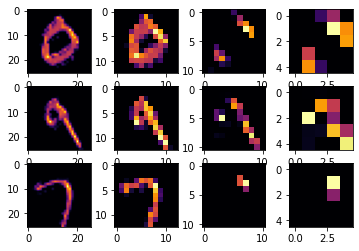

In [93]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=3
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 5
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)